In [22]:
import pandas as pd
df = pd.read_csv('grow_80.csv')
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1
0,1983Q1,Daryl Hall John Oates,1.0,False,1.0,1,Maneater,13.0,6896.561
1,1983Q1,Michael Jackson And Paul McCartney,3.0,False,2.0,2,The Girl Is Mine,10.0,6896.561
2,1983Q1,Don Henley,4.0,False,3.0,3,Dirty Laundry,11.0,6896.561
3,1983Q1,Men At Work,8.0,False,4.0,4,Down Under,10.0,6896.561
4,1983Q1,Marvin Gaye,7.0,False,5.0,5,Sexual Healing,11.0,6896.561
...,...,...,...,...,...,...,...,...,...
23580,1990Q1,New Order,NaN,NaN,NaN,96,World in Motion,NaN,9364.259
23581,1990Q1,Gloria Estefan,NaN,NaN,NaN,97,Here We Are,NaN,9364.259
23582,1990Q1,Partners In Kryme,NaN,NaN,NaN,98,Turtle Power,NaN,9364.259
23583,1990Q1,Nick Kamen,NaN,NaN,NaN,99,I Promised Myself,NaN,9364.259


In [23]:
df['rank_gain/loss'] = df['track_lp'] - df['track_rank']
df.dropna(inplace=True)
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss
0,1983Q1,Daryl Hall John Oates,1.0,False,1.0,1,Maneater,13.0,6896.561,0.0
1,1983Q1,Michael Jackson And Paul McCartney,3.0,False,2.0,2,The Girl Is Mine,10.0,6896.561,1.0
2,1983Q1,Don Henley,4.0,False,3.0,3,Dirty Laundry,11.0,6896.561,1.0
3,1983Q1,Men At Work,8.0,False,4.0,4,Down Under,10.0,6896.561,4.0
4,1983Q1,Marvin Gaye,7.0,False,5.0,5,Sexual Healing,11.0,6896.561,2.0
...,...,...,...,...,...,...,...,...,...,...
22780,1990Q3,The Righteous Brothers,0.0,True,45.0,45,Unchained Melody,1.0,9404.494,-45.0
22781,1990Q3,Sydney Youngblood,50.0,False,46.0,46,I'd Rather Go Blind,7.0,9404.494,4.0
22782,1990Q3,Heart,61.0,False,47.0,47,Stranded,3.0,9404.494,14.0
22783,1990Q3,Snap!,57.0,False,48.0,48,Ooops Up,5.0,9404.494,9.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="rank_gain/loss")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

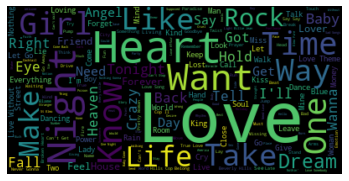

In [25]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.track_title)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [26]:
df = df[df['rank_gain/loss'] != 0]
df['sentiment'] = df['rank_gain/loss'].apply(lambda rating : +1 if rating > 0 else -1)

C:\Users\java\AppData\Local\Temp\ipykernel_17916\701095560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss,sentiment
1,1983Q1,Michael Jackson And Paul McCartney,3.0,False,2.0,2,The Girl Is Mine,10.0,6896.561,1.0,1
2,1983Q1,Don Henley,4.0,False,3.0,3,Dirty Laundry,11.0,6896.561,1.0,1
3,1983Q1,Men At Work,8.0,False,4.0,4,Down Under,10.0,6896.561,4.0,1
4,1983Q1,Marvin Gaye,7.0,False,5.0,5,Sexual Healing,11.0,6896.561,2.0,1
5,1983Q1,Toni Basil,2.0,False,1.0,6,Mickey,19.0,6896.561,-4.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
22780,1990Q3,The Righteous Brothers,0.0,True,45.0,45,Unchained Melody,1.0,9404.494,-45.0,-1
22781,1990Q3,Sydney Youngblood,50.0,False,46.0,46,I'd Rather Go Blind,7.0,9404.494,4.0,1
22782,1990Q3,Heart,61.0,False,47.0,47,Stranded,3.0,9404.494,14.0,1
22783,1990Q3,Snap!,57.0,False,48.0,48,Ooops Up,5.0,9404.494,9.0,1


In [28]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

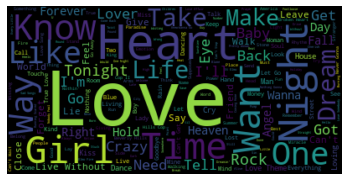

In [29]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.track_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

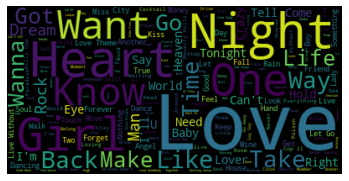

In [30]:
neg = " ".join(review for review in negative.track_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [31]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

C:\Users\java\AppData\Local\Temp\ipykernel_17916\1108073838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\java\AppData\Local\Temp\ipykernel_17916\1108073838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df['track_title'].value_counts()[:8]

Hold On                                  41
Love Song                                36
Angel                                    36
Heaven                                   34
Heart And Soul                           34
How Am I Supposed To Live Without You    33
Poison                                   32
Missing You                              32
Name: track_title, dtype: int64

In [33]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['track_title'] = df['track_title'].apply(remove_punctuation)
df = df.dropna(subset=['track_title'])

C:\Users\java\AppData\Local\Temp\ipykernel_17916\3186846728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
dfNew = df[['track_title','sentiment']]
dfNew.head()

,track_title,sentiment
1,The Girl Is Mine,1
2,Dirty Laundry,1
3,Down Under,1
4,Sexual Healing,1
5,Mickey,-1


In [35]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['track_title'])
test_matrix = vectorizer.transform(test['track_title'])

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [39]:
lr.fit(X_train,y_train)

C:\Users\java\Documents\GitHub\economic-impacts-on-music\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [40]:
predictions = lr.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[  23,   53],
       [1221, 2981]], dtype=int64)

In [42]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.02      0.30      0.03        76
           1       0.98      0.71      0.82      4202

    accuracy                           0.70      4278
   macro avg       0.50      0.51      0.43      4278
weighted avg       0.97      0.70      0.81      4278

